<a href="https://colab.research.google.com/github/dagyaom/Python_Practice/blob/main/%ED%86%B5%EA%B3%84%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석(regression analysis)



- 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한 뒤 적합도를 측정해 내는 분석 방법.

 1) 단순회귀분석(simple regression analysis) : 1종속변수, 1독립변수 사이 관계 분석
 
 2) 다중회귀분석(multiple regression analysis) : 1종속변수, 多독립변수 사이 관계분석

 - 어떤 변수가 다른 변수에 의해 설명된다고 보고 그 함수관계를 조사하는 통계적 해석기법인 회귀분석은 
 - 실험 집단 간에 어떠한 차이가 존재하는지 밝히는데 적용하는 검정 기법인 분산분석(ANOVA)와 함께매우 실용적인 연구방법론의 주요한 도구이다. 



In [ ]:
## 참고
결론적으로 말하면 ANOVA 와 회귀분석의 결과는 동일합니다.
큰 의미에서는 General Linear Model 이고, 이것을 세분화하면 ANOVA 와 회귀분석이 있는 것입니다.
다만, ANOVA 는 집단간 평균의 차이에 초점이 맞춰져 있고,
회귀분석은 영향에 맞춰 있을 뿐이죠.
따라서 독립변수들이 범주형 변수일 때는 ANOVA 가 유리하고, 연속형 변수일 때는 회귀분석이 해석시에 유리합니다.

# http://www.statedu.com/QnA/231863;;

In [ ]:
## 표준가정
오차항은 모든 독립변수 값에 대하여 동일한 분산을 갖는다. (선형성)
오차항의 평균(기대값)은 0이다. (정규성)
수집된 데이터의 확률 분포는 정규분포를 이루고 있다.
독립변수 상호간에는 상관관계가 없어야 한다. (독립성)
시간에 따라 수집한 데이터들은 잡음의 영향을 받지 않아야 한다.

In [ ]:
# 다중공선성 문제
'독립변수 상호간에는 상관관계가 없어야 한다. (독립성)' 을 위배
- 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제.

# 진단법
1. 결정계수 R2값은 높아 회귀식의 설명력은 높지만 식안의 독립변수의 P값(P-value)이 커서 개별 인자들이 유의하지 않는 경우가 있다. 이런 경우 독립변수들 간에 높은 상관관계가 있다고 의심된다.
2. 독립변수들간의 상관계수를 구한다.
3. 분산팽창요인(Variance Inflation Factor,VIF)를 구하여 이 값이 10을 넘는다면 보통 다중공선성의 문제가 있다.

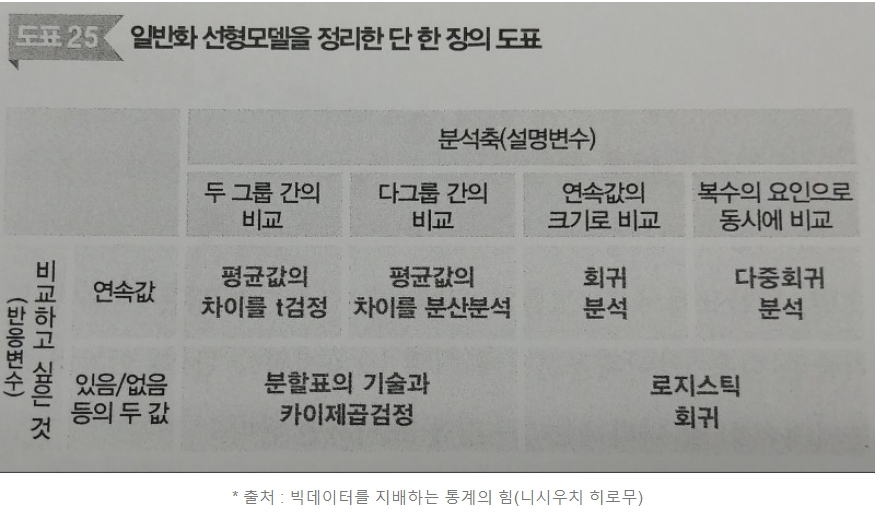

- 핵심 : 예측값, 잔차(residual)
 - 예측값 : 만들어진 모델이 추정하는 값.
 - 잔차 : 회귀선에서 예측값 - 관측값(오차 : 모집단에서 예측값-관측값)

- '회귀선(추세선)' : 잔차 제곱의 합 RSS/SSE 를 최소화하는 직선
- '비용함수(Cost Function)' : 잔차 제곱의 합 RSS/SSE을 나타내는 함수
- '학습' = 비용함수를 최소화하는 모델을 찾는 과정
- 여기서 계수 $\alpha$ 와 $\beta$ 는 RSS를 최소화 하는 값으로 모델 학습을 통해서 얻어지는 값.
- 잔차제곱합을 최소화하는 방법을 최소제곱회귀 혹은 Ordinary least squares(OLS)(최소자승법)라고 부른다.-->최소자승법을 통해 선형회귀계수를 구한다.

https://youtu.be/ve6gtpZV83E

선형회귀는 
- 보간(interpolate)하여 예측한다. : 데이터 사이 주어져 있지 않은 값을 예측
- 외삽(extrapolate)를 제공한다. : 기존 데이터 범위를 넘어서는 값 예측



선형회귀 직선은
- 독립변수(independent variable, x)와 종속변수(dependent variable, y) 간의 관계를 요약해 준다.

- 종속변수 : 반응변수(Response), 레이블(Lable), 타겟(target)
- 독립변수 : 예측변수(Predictor), 설명(Explanatory), 특성(feature)

< data preprocessing>

- 깨끗한 데이터

- outlier 제거

- data imbalance

- 피쳐고르기, 결측치제거, 학습 평가 세트분리 등

- 스케일링 : fit_transform, transform

<model 'deveolopment'> 

- ridge regression, 

- logistic regression, 

- random forest(분류)(data imbalance 잘 못잡는다), 

- xgboost(data imbalance해결에 너무 좋은 모델)

In [ ]:
# pip install -U pandas-profiling

In [ ]:
pip install --upgrade category_encoders   #원핫인코더에 필요

In [ ]:
import sklearn
sklearn.__version__

# sklearn 재설치
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

# sklearn 버전 재확인 -> 0.23 이상으로 설치되었는지 확인
import sklearn
sklearn.__version__


# 사이킷런 새로 설치해줘야, 

세연님 : 1. 기준모델과 MAE의 의미와 그것을 구하는 과정의 예시(211)

민석님 : 2. scikit-learn을 이용하여 단순 선형회귀를 진행하는 과정과 그 예시(211 212)

효섭님 : 3. 선형회귀모델의 계수의 의미와 그것을 구하는 과정의 예시(선형회귀 식 포함)(211)

용우님 : 4. 범주형 자료를 다루기 위한 원핫인코딩을 설명하고 그 예시를 들어주세요(213)

소향님 : 5. 특성공학에 사용되는 SelectKBest를 사용하는 이유와 그 방법의 예시(213)

민찬님: 6. ridge regression을 하는 이유와 그 예시(213)

인중님 : 7. logistic regression을 하는 이유와 그 예시(214)

## 변수 선택

- 데이터셋을 보고 사용가능한 변수를 선택하기
- target에 영향을 끼치는 feature가 무엇일지 잘 선택하는 것이 중요
- 기준을 뭘로 할것인가?

결측치가 많은 데이터

범주의 종류가 너무 많은 것: value_count()를 통해 범주확인
 등

 제외할 것 제외하기.

## 1.데이터셋 나누기(train/validate/tast)

- 데이터 전처리의 마지막 단계로, 데이터셋을 다음 세 가지 데이터셋으로 나눈다.

• 훈련 데이터셋(training set): 신경망을 훈련시키는 데 사용한다.

• 검증 데이터셋(validation set): Hyper-parameters(초매개변수)를 튜닝하는 데 사용한다. 즉, 예측의 오류를 측정할 때 사용.

• 테스트 데이터셋(testing set): 일반화 검증을 위해 마지막에 딱 한번 사용한다. 신경망의 성능을 최종 평가하는 데 사용한다.(data leakage 데이터 유출 방지)
(data leakage를 막기 위해 pipeline을 쓴다.; 전처리 과정의 자동화)

- 데이터 수가 적을 때는 K-fold 교차검증(cross-validation)을 진행할 수 있음.




https://thebook.io/080232/ch02/06/03/

https://3months.tistory.com/118



### 1)데이터셋을 나누는 여러가지 방법
https://wdprogrammer.tistory.com/29

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

### 2)데이터셋을 나누는 이유 

: 머신러닝을 통해서 예측이나 분류를 할 수 있는데, 이 예측이나 분류가 얼마나 정확한지 자문하는 과정이 필요하기 때문. 

- 일반적으로 훈련 데이터셋과 검증 데이터셋은 모델을 튜닝하고 개선하는 데 사용한다. 

- train 데이터 : 신경망 학습에 이용

- 검증 데이터셋 : 훈련을 조기 종료할지 결정하는 데 사용하기도 한다.(모델의 검증 데이터셋 예측 성능이 더 이상 좋아지지 않는 시점에 훈련을 종료) 이 방식은 신경망의 과적합을 방지하는 효과가 있다.

- 테스트 데이터셋은 홀드아웃(holdout) 데이터셋이라고도 하는데, 신경망을 훈련시키는 데 절대 사용하지 않기 때문이다. 이 데이터셋은 모델 성능을 최종 평가하는 데 사용한다. 이 방식은 모델의 실세계 성능을 비교적 정확하게 반영할 수 있다.

- 데이터셋을 나누는 비율도 중요하다. 훈련 데이터셋을 많이 할당하면 모델 성능은 향상시킬 수 있지만 과적합에 대처할 수 없게 된다. 반대로 검증 데이터셋과 테스트 데이터셋을 많이 할당하면 훈련 데이터셋이 부족해 모델 성능이 감소할 수 있다.


- 여기서 굳이 검증세트를 두는 이유는 뭘까?(훈련 데이터와 테스트 데이터만으로도 훈련의 척도를 판단할 수 있는데? )

 1) 훈련 데이터에 대한 학습만을 바탕으로 모델의 설정(Hyperparameter)를 튜닝하게 되면 과대적합(overfitting)이 일어날 가능성이 매우 크다. ==> 훈련세트로 모델을 한번에 완전하게 학습시키기가 어렵기 때문.

 2) 테스트 데이터는 학습에서 모델에 간접적으로라도 영향을 미치면 안 되기 때문에 테스트 데이터로 검증해서는 안된다. 

즉, 과적합을 피하고 편향을 제거한 데이터로 모델 성능을 평가하기 위해서이다. = 모델의 일반화 성능을 올바르게 측정하기 위함이다. 

이러한 이유로 검증(validation) 데이터셋을 따로 두어 매 훈련마다 검증 데이터셋에 대해 평가하여 모델을 튜닝해야 한다. 

#### 여기서 잠깐, HyperParameter(초매개 변수)란??

- Parameter : 모델 내부에서 확인이 가능한 변수. 즉, 데이터를 통해서 산출이 가능한 값.(평균, 표준편차, 결정계수 등...)

- HyperParameter : 모델에서 외적인 요소, 즉, 데이터 분석을 통해 얻어지는 값이 아니고 사용자에 의해 정해지는 값. 

가중치와 같이 모델이 스스로 설정 및 갱신하는 매개변수가 아닌, 사람이 직접 설정해주어야 하는 매개변수를 의미함. 



#### stadard scaling(표준화)을 할 때에도 train/test를 나눠줘야 함. 

데이터의 패턴을 인식한다는 것 = 데이터의 분포를 인식한다는 것.

나눠주지 않으면 test의 분포까지도 학습하게 된다. 

--> data leaklage 발생.

- data leaklage : 객관성을 가지고 있는 데이터정보가 내 모델로 흘러들어오게 하는 모든 것.

- 데이터 누수를 막기위해 : pipeline이용

### 3)데이터셋 나누기 코딩

- 무작위로 나누기가 일반적(80:20 or 75:25의 비율을 많이 쓴다.)
- 시계열 데이터 : 훈련데이터보다 테스트 데이터가 미래의 것이어야 한다. 

#### 무작위 나누기1 :sklearn 이용

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, train_size = 0.8, test_size=0.2, random_state=2)

print("train shape: ", train.shape)
print("val shape: ", val.shape)

In [ ]:
# feature/target 나누기

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] #변수 선택
target = 'Survived' 

X_train = train[features] # 사이킷런 선형회귀모델을 만들기 위해서, 특성행렬은 2차원으로 만들어줘야 함. 타겟배열은 1차원형태.
y_train = train[target]

X_val = val[features]
y_val = val[target]

#### 무작위나누기2 : sample() 이용

In [ ]:
# 데이터의 75%갯수 확인하기
len(df)*0.75  

In [ ]:
train = df.sample(frac=0.75, random_state=1)
test = df.drop(train.index)

In [ ]:
# train, test 길이비교
len(train), len(test)

## 2.기준모델 정하기(Baseline)
- 기준모델이 뭔가요 ? : 예측 모델을 구체적으로 만들기 전에 가장 간단하면서 직관적인 방법으로 예측해보는 것. 최소한의 성능을 나타내는 기준이 되는 모델을 만드는 것.

- 목적 : 우리가 학습할 모델과 간단하게 비교해보는 것. 

- 뭔가를 예측할 때, 가장 간단하고 직관적인 방법으로 예측해보는 것. : 평균값, 중앙값 등 이용



### 1)Regression(회귀)

- baseline : 타겟 변수의 평균값

In [ ]:
# 시각화

x = df['GrLivArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()  # 절대값을 구할때 abs라는 이름의 함수를 사용

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

### 2)Classification(분류)

- baseline : 타겟 변수의 최빈값. 최다 비율 클래스.
- 시계열 데이터의 경우 : 어떤 시점을 기준으로 이전 시간의 데이터

왜 최빈값이어야 하는가?
--> 분류문제에서는 타겟변수가 편중된 범주비율을 가지는 경우가 많고, 이러한 데이터에서 최빈 범주를 기준으로 하지않을 경우 모델 성능을 착각할 수 있기 때문이다. 

 예를 들면, 클래스 1과 0의 비율이 9:1인 학습데이터로 모델만드니까 모델예측정확도가 90% -> 이 모델은 좋은 성능인가? 

 -> 아니다. 이 데이터는 모델이 무조건 1만 찍도록 만들면 정확도 90%. 그러므로 클래스1에 대한 정확도가 90%인 기준모델을 설정하고 더 좋은 성능을 가지는 모델을 만들어야 함.

☆☆ 분류 문제 풀기전에는 항상 먼터 타겟 범주의 비율을 확인해 볼 것.

In [ ]:
# 타겟을 정한다
target = 'Price'

# 타겟 데이버 범주의 비율 확인
y_train = train[target]
y_train.value_counts(normalize=True)  # value_counts(): 유일값별 갯수세기 #normalize: 확률로 나타냄. # pd.Series 형태로 값 나온다. 

In [ ]:
# 최빈값(majority class) 빼내기.
major = y_train.mode()[0]  # mode() : 최빈값만 pd.Series형태로 반환함. [0]을 붙여줘서(slicing) 시리즈의 0번째 값만 출력해달라고 함.

# 기준모델 만들기.(리스트 형태로 만든다.)
y_pred = [major]*len(y_train)  #y_train의 갯수만큼 곱해줌.

In [ ]:
## 참고: 수치형 데이터에 대한 통계치 확인할 때(df중에서 수치형 데이터만 통계내 준다.
df.describe()

## 3.카테고리 데이터 처리 : OneHotEncoder

https://contrib.scikit-learn.org/category_encoders/onehot.html

In [ ]:
train['Ticket'].value_counts() # 범주확인을 꼭 먼저하고, OneHotEncoder하기에 적합한지 아닌지 확인:범주가 너무 많진 않은가.
# 일반화하기에 적합하지 않지는 않은가. 

#데이셋 나누기 전에 먼저 해야함. 

In [ ]:
encoder = OneHotEncoder(use_cat_names = True)  
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)


#use_cat_name = True : 카테고리 이름을 표기해준다. (default=False : 각 카테고리를 숫자로 표현)
#결측치까지도 nan으로 카테고리 이름 표기해준다. 

## 4.결측치(missing value) 처리 : SimpleImputer

 sklearn.impute.SimpleImputer

- strategy, default=’mean’/“median”/“most_frequent”/"constant"

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html


- 결측치를 처리할 떄 평균값, 중앙값 뭘 넣어야 하나?
: 데이터가 극단적이면 평균값의 의미가 없다. outliar가 심한경우 평균값의 의미가 없음.
- 아웃라이어가 있을 때 전처리에 평균값을 내주는게 bias가 발생할 수 있음. 이럴땐 중앙값을 구하는게 정확하다.!
- 즉 impute할 때에는 데이터의 정확한 분포를 보고 impute하라.


아니 그럼, 아웃라이어가 어디서 얼마나 분포하는지 어떻게 확인하지?

-> 방법: https://lsjsj92.tistory.com/556

In [ ]:
# 결측치 알아보기
train.info()

In [ ]:
# 결측치를 심플하게 각 특성의 평균값으로 채우기.(사이킷런 선형회귀함수는 결측값이 존재하는 모델을 돌릴 수 없음)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')  #mean이 디폴트라서 굳이 안넣어도 됨.
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)


In [ ]:
# ★Train, test 로 나누기 전에 이렇게 하기도 하는데, 차이가 뭘까? 
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

## 5.표준화 : StandardScaler

(평균0, 표준편차=1)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [ ]:
# 평균, 표준편차 확인
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()  #  mean(), std() 메소드는 열의 평균을 계산한다. 그러므로 transformation 해줘야함.

## 6.Model development

- 데이터의 패텬을 캡쳐하는 모델을  만드는 것이 목적(여기서 분산, 편향의 개념이 나온다.) how?
-> cost function을 최소화함으로써.(에러를 최소화함)

- scikit-learn 활용 :머신러닝에 가장 많이 활용되는 라이브러리.
- scikit-learn에 사용되는 데이터구조
 - feature matrix, label vector
 - 특성데이터는 X, 2차원행렬(numpy행렬, dataframe으로 표현)
 - 타겟데이터는 y, 1차원 형태(numpy배열, pd.series로 표현)



- 단순선형회귀식은 다음과 같다: 
$y = \beta_0 + \beta_1 x $

- 2특성의 다중선형회귀 식은 다음과 같다: 
$y = \beta_0 + \beta_1x_1 + \beta_2x_2$

### 1) Simple Linear Regression(단순 선형회귀)

- 단순선형회귀분석이란 단일 독립변수에 대한 종속변수의 추이를 분석하는 것
- 단순선형회귀모델은 이런 원리를 사용하여 주어진 feature와 target의 관계를 학습하고 정확한 수치(기울기, 절편)로 나타내는 것을 말한다.
- target에 영향을 끼치는 feature가 무엇일지 잘 선택하는 것이 중요
- 시각화를 통해 상관관계를 눈으로 파악하거나, 공분산 혹은 상관계수를 확인해 보거나, 좋은 특성을 분별하는 작업까지 코딩으로 처리하여 정확도를 높이면 좋은 특성을 선택할 수 있다.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# scikit-learn 라이브러리에서 사용할 예측모델 클래스를 import
from sklearn.linear_model import LinearRegression

In [ ]:
# 예측모델 인스턴스 만들기 
model = LinearRegression()

# 인스턴스란? http://wiki.hash.kr/index.php/%EC%9D%B8%EC%8A%A4%ED%84%B4%EC%8A%A4
# 인스턴스란 객체지향 프로그래밍에서 클래스에 소속된 개별적인 객체를 의미.
# # - 인스턴스는 클래스내의 객체에 대해 특정한 변형을 정의하고 이름을 붙인 뒤, 그것을 물리적인 어떠한 장소에 위치시키는 작업을 통해 만든다.
# 객체가 메모리에 할당되어 실제 사용될 때 인스턴스라고 함. 
# 객체는 선언, 인스턴스는 실체화.
# 클래스의 타입으로 선언되었을 때 객체, 그 객체가 메모리에 할당되어 실제 사용될 때 인스턴스라고 부른다. 

In [ ]:
# 모델학습(fit)
model.fit(X_train, y_train)

In [ ]:
# 테스트 데이터를 모델통해 예측한다.
X_test= [[x] for x in df_t['GrLivArea']]
p_pred = model.predict(X_test)

In [ ]:
# 시각화

import seaborn as sns
sns.regplot(x=train['GrLivArea'], y=train['SalePrice']).set_tilie('Housing Prices');

In [ ]:
## train 데이터에 대한 그래프를 그려보겠습니다.
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내 보겠습니다.
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

In [ ]:
# 피쳐 여러개를 2차원 평면에 시각화
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'LotArea','SalePrice']
sns.pairplot(df[cols], height=2,kind="reg"); #kind="reg" 회귀선 그려주기

#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221995887346

### 2) Multiple Linear Regression(다중 선형회귀)

-단순 선형회귀에서는 모델이 직선의 방정식으로 표현되지만, 다중선형회귀는 평면 그 이상으로 표현된다. (특성 2개면 평면의 방정식으로 표현됨.)

In [ ]:
# 3D 시각화 : 데이터를 산점도로 알아보기.

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')  #어떤 스타일로 출력하고싶은지 디자인적인 부분 결정. https://hong-yp-ml-records.tistory.com/88
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d') # gca = 축을 결정

ax.scatter(train['GrLivArea'], train['OverallQual'], train['SalePrice'])
ax.set_xlabel('GrLivArea', labelpad=12)
ax.set_ylabel('OverallQual', labelpad=10)
ax.set_zlabel('SalePrice', labelpad=20)

plt.suptitle('Housing Prices', fontsize=15)
plt.show()

# (참고) plotly를 사용해서 상대적으로 간단히 그래프를 그릴 수도 있습니다.
# px.scatter_3d(
#     train,
#     x='GrLivArea', 
#     y='OverallQual', 
#     z='SalePrice',  
#     title='House Prices'
# )

In [ ]:
# 3D에 선형회귀 평면 나타내기

import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import itertools

def surface_3d(df, f1, f2, target, length=20, **kwargs):
    """
    2특성 1타겟 선형모델평면을 시각화 합니다.
    
    df : 데이터프레임
    f1 : 특성 1 열 이름
    f2 : 특성 2 열 이름
    target : 타겟 열 이름
    length : 각 특성의 관측치 갯수
    
    """
    
    # scatter plot(https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d)
    plot = px.scatter_3d(df, x=f1, y=f2, z=target, opacity=0.5, **kwargs)  #opacity=0.5 : 마커의 불투명도
    
    # 다중선형회귀방정식 학습
    model = LinearRegression()
    model.fit(df[[f1, f2]], df[target])    

    # 좌표축 설정
    x_axis = np.linspace(df[f1].min(), df[f1].max(), length)
    y_axis = np.linspace(df[f2].min(), df[f2].max(), length)
    coords = list(itertools.product(x_axis, y_axis)) # ★itertools.product(순열조합) : https://geonlee.tistory.com/69 , https://velog.io/@davkim1030/Python-%EC%88%9C%EC%97%B4-%EC%A1%B0%ED%95%A9-product-itertools 
    
    # 예측
    pred = model.predict(coords)  # 잘 해석이 안됭...
    z_axis = pred.reshape(length, length).T
    
    # plot 예측평면
    plot.add_trace(go.Surface(x=x_axis, y=y_axis, z=z_axis, colorscale='Viridis'))
    
    return plot

In [ ]:
surface_3d(
    train,
    f1='GrLivArea', 
    f2='OverallQual', 
    target='SalePrice',  
    title='House Prices'
)

선형회귀는 다른 ML모델에 비해 상대적으로 학습이 빠르고 설명력이 강하다.

하지만 선형모델이므로 과소적합(underfitting)이 잘 일어난다는 단점이 있다. 


# 과적합(Overfitting), 과소적합(Underfitting)

1. 일반화(generalization)
- 모델 디벨롭의 목적은 '일반화(최적화)가 잘 된 모델'을 만드는 것. 
= 훈련데이터에서와 같이 테스트데이터에서도 좋은 성능을 내는 모델을 의미.
- 만약 데스트데이터에 오차가 있다면 이를 '일반화 오차'라고 함.
- 모델이 훈련데이터에 과적합하지 않도록 하는 많은 '일반화 방법'이 있다. 


과적합 : 모델이 훈련데이터에만 특수한 성질을 과하게 학습해 일반화를 못해 결국 테스트데이터에서 오차가 커지는 현상

과소적합 : 훈련데이터에 과적합도 못하고 일반화 성질도 학습하지 못해서, 결국 훈련/테스트 데이터 모두에서 오차가 크게 나오는 경우.

- 편향(bias) : 학습 알고리즘에서 잘못된 가정을 했을 때 발생하는 오차. 높은 편향값은 알고리즘이 데이터의 특징과 결과물과의 적절한 관계를 놓치게 만드는 과소적합(underfitting)문제를 발생시킨다. 
- 분산(variance) : 트레이닝 셋에 내재된 작은 변동 때문에 발생하는 오차. 높은 분산값은 큰 노이즈까지 모델링에 포함시키는 과적합(overfitting)문제를 발생시킨다. 

- 이상적인 모델은 데이터의 규칙성을 잘 잡아내어 정확하면서도 다른 데이터가 들어왔을 떄도 잘 일반화할 수 있는 모델이다. 하지만 실제 상황에서는 두 가지를 동시에 만족하는 것은 거의 불가능하다. 

- 분산이 높은 경우 : 모델이 학습데이터 노이즈에 민감하게 적합하여 테스트데이터에서 일반화를 잘 못하는 과적합상태
- 편향이 높은 경우 : 모델이 학습데이터에서, 특성과 타겟변수의 관계를 잘 파악하지 못한 과소적합 상태.

- 편향-분산 트레이드오프(Bias-variance tradeoff) : 지도학습 알고리즘이 트레이닝 셋의 범위를 넘어 지나치게 일반화하는 것을 예방하기 위해 두 종류의 오차(편향, 분산)를 최소화할 때 겪는 문제이다. 




https://bywords.tistory.com/entry/%EB%B2%88%EC%97%AD-%EC%9C%A0%EC%B9%98%EC%9B%90%EC%83%9D%EB%8F%84-%EC%9D%B4%ED%95%B4%ED%95%A0-%EC%88%98-%EC%9E%88%EB%8A%94-biasvariance-tradeoff

- overfitting을 방지하는 3가지 방법.

1) 첫 번째 : training data를 많이 모으는 것이다. 데이터가 많으면 training set, validation set, test set으로 나누어서 진행할 수 있고, 영역별 데이터의 크기도 커지기 때문에 overfitting 확률이 낮아진다. 달리 생각하면 overfitting을 판단하기가 쉬워지기 때문에 정확한 모델을 만들 수 있다고 볼 수도 있다.

2) 두 번째 : feature의 갯수를 줄이는 것이다. 이들 문제는 multinomial classification에서도 다뤘었는데, 서로 비중이 다른 feature가 섞여서 weight에 대해 경합을 하면 오히려 좋지 않은 결과가 나왔었다. 그래서, feature 갯수를 줄이는 것이 중요한데, 이 부분은 deep learning에서는 중요하지 않다고 말씀하셨다. deep learning은 sigmoid 대신 LeRU 함수 계열을 사용하는 것도 있고 바로 뒤에 나오는 dropout을 통해 feature를 스스로 줄일 수 있는 방법도 있기 때문에.

3) 세 번째 : regularization. 앞에서는 weight이 너무 큰 값을 갖지 못하도록 제한하기 위한 방법으로 설명했다. 이 방법을 사용하면 weight이 커지지 않기 때문에 선이 구부러지는 형태를 피할 수 있다.



출처: https://pythonkim.tistory.com/42 [파이쿵]

- 모델이 복잡해질수록 훈련데이터 성능은 계속 증가하는데, 검증데이터 성능은 어느정도 증가하다가 증가세가 멈추고 오히려 낮아지는 지점이 있음.(과적합이 일어나는 지점)

### 3) Ridge regression(Ridge 회귀) 

### 4)Logistic Regression(로지스틱 회귀) 

로지스트 회귀는 특성변수를 로지스틱 함수 형태로 표현함.

그래서 관측치가 특정 클래스에 속할 확률값으로 계산된다. 

확률값이 정해진 기준값보다 크면 1, 아니면 0으로 예측을 하게 된다.

#### 시그모이드(Sigmoid) 함수(로지스틱 함수)
$$\large P(X)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}$$

$$ 0 \leq P(X) \leq 1$$

- 데이터가 가지고 있는 값(위치)를 확률(%)로 변환시켜줌.
- 원래는 회귀인데, 0.5라는 기준을 두고 분류로 바꿔준다. 
- 만약 data Imbalance라면, 0.5디폴트값을 조절해줘야 한다. 

<img src="https://qph.fs.quoracdn.net/main-qimg-6c3393d3dd37f9fdac89e7971126c726" width="500"/>


<임계값 조절하는 법>

로지스틱 회귀의 0.5디폴트를 바꾸는 방법. : threshold(임계값) 모르겠다 너무 어렵다..!

-https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification

https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

-모르겠지만 임계값 찾는 방법: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

https://stackoverflow.com/questions/44609336/logistic-regression-in-python-probability-threshold 임계값대신 c값으로 과적합 해결..

#### Imbalanced Data

- 문제가 되는 이유 : 불균형한 데이터를 그대로 예측하게 되면 과적합문제가 발생할 가능성이 높아짐. --> 모델의 일반화를 낮추게 된다. 
- 즉, 단순히 우세한 클래스를 택하는 모델의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 
- 즉, 정확도(accuracy)가 높아도 데이터 객수가 적은 클래스의 재현율(recall-rate_이 급격히 작아지는 현상이 발생할 수 있다.

1) https://shinminyong.tistory.com/34 

2) https://techblog-history-younghunjo1.tistory.com/74 

3) https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

#### Losit transformation(로짓변환) : 로지스틱 회귀의 계수 해석하기

비선형 함수내에 있어서 직관적 해석이 어려운 로지스틱 회귀 계수! 

오즈(Odds)를 사용해 선형결합 형태로 변환하면 쉽게 해석할 수 있다.

- 오즈(Odds) : 실패확률에 대한 성공확률의 비.

- 특성 1단위 증가당 확률이 p배 증가한다 고 해석함.

ex) odds = 4 : 성공확률이 실패확률의 4배. 클래스1 확률에 대한 클래스 0 확률의 비.

- 오즈에 로그를 취해 다음과 같이 변환한 것을 '로짓변환(logit transformation)이라고 함. 

$Odds = \large \frac{p}{1-p}$, 

p = 성공확률, 1-p = 실패확률

p = 1 일때 odds = $\infty$

p = 0 일때 odds = 0

$\large ln(Odds) = ln(\frac{p}{1-p}) = ln(\frac{\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}{1 - \frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}) = \normalsize \beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p}$

-> 비선형형태인 로지스틱 함수형태를 선형형태로 만들어서 회귀계수 의미를 해석하기 쉽게 함. 

-> 특성 X의 증가에 따라 로짓(in(odds))가 얼마나 증가 or감소했다 라고 해석한다. 

- 기존 로지스틱 y : 0~1값.
- 로짓 : -$\infty$ ~ $\infty$

<img src="https://i.imgur.com/r2uD4dI.png" />





#### 로지스틱 회귀모델 만들기

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_imputed, y_train)
y_pred = logistic.predict(X_val_imputed)  #예측하기.

## 7.회귀계수 수치확인

In [ ]:
logistic.coef_ 

# 선형회귀의 계수와 똑같이 해석. 계수가 양수일 경우 생존 가능성 높이고, 음수일 경우 생존가능성 낮추고.


# 2차원 어레이 배열 return
# array([[-0.91583324,  0.66209498, -0.66209498, -0.55995667, -0.4064657 ,
#         -0.01589705,  0.07801561, -0.09493895,  0.00768412,  0.07722434,
#          0.18883667]])

# logistic.coef_[0] : 어레이 배열에서 첫번째 리스트를 꺼낸다.
# array([-0.91583324,  0.66209498, -0.66209498, -0.55995667, -0.4064657 ,
#         -0.01589705,  0.07801561, -0.09493895,  0.00768412,  0.07722434,
#          0.18883667])

In [ ]:
# 계수 값이 너무 많을 경우 시리즈 형태로 만들어서 인덱스 붙여주기

coefficients = pd.Series(model.coef_[0], index = X_train_encoded.columns) #'index=' 생략가능. 시리즈에서는 인덱스를 항상 뒤에 적어줘야 함.
coefficients

# [0] : 2차원 어레이 배열에서 첫번째 어레이를 빼낸다. 
# 시리즈는 1차원만 담을 수 있다. (1차원 array 혹은 list)

# Pclass         -0.915833
# Sex_female      0.662095
# Sex_male       -0.662095
# Age            -0.559957
# SibSp          -0.406466
# Parch          -0.015897
# Fare            0.078016
# Embarked_S     -0.094939
# Embarked_Q      0.007684
# Embarked_C      0.077224
# Embarked_nan    0.188837

In [ ]:
# 회귀계수와 그 상관관계를 시각화하기

coefficients.sort_values().plot.barh();

In [ ]:
# 절편 구하기 : 모든 특성이 0인 경우. 해석이 크게 유용하진 않은 편.
model.intercept_

In [ ]:
# 2차원 다중선형회귀식 만들기

b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

## 8.임의의 값 모델에 넣어서 예측하기.

### 선형회귀

In [ ]:
model.predict([[2000,10]])

#array([336654.30716253])

In [ ]:
# 선형회귀 : 예측함수 만들기
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택가격예측 : ${int(y_pred[0])} (1sqft당 추가금: ${int(model.coef_[0])})
    return pred

In [ ]:
square_feet = 4000인 테스트 데이터로 예측
print(explain_prediction(4000))

# 4000 sqft 주택 가격 예측: $447090 (1 sqft당 추가금: $107)

In [ ]:
# ipywidgets 라이브러리 사용 -> sqft를 바꾸어가며 예측

from ipywidgets import interact

@interact  #데코레이터 interact추가

def explain_prediction(sqft=(500,10000)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택가격예측: ${int(y_pred[0]))} (1sqft당 추가금: ${int(model.coef_[0])})"
    
    return pred

### logistic

In [ ]:
# logistic - Pclass는 낮추고(1등석) 5살의 어린 나이에 비싼 요금을 넣어 보겠습니다. (1, 5, 600) 이 아기는 무조건 생존할 것 같습니다.

test_case = [[1, 5, 600]]  # 특성행렬은 2차원 행렬로 넣어줘야 한다. scikit-learn으로 모델을 만들떄는 X는 메트릭스 형태, y는 벡터형태의 데이터구조를 넣어줘야 함.
logistic.predict(test_case) 

# 0또는 1의 array로 return

In [ ]:
# 각 클래스에 속할 확률값 확인(test_case가 0에 속할  확률, 1에 속할 확률)
logistic.predict_proba(test_case)

## 9.평가지표(evaluation metrics)

- 모델을 만드는 이유는 일반화를 통해 미래 예측을 추정하고자 하는 것. 
- 그래서 train data로 학습시키고, 알고리즘을 계속 수정하고, 최고의 성능을 발휘하는 모델을 선택하여 예측 성능을 높힌다.

- 그렇게 여러가지로 만든 모델을 서로 비교해서 좋은 모델을 선택해야 하는데, 이때 모델평가지표를 사용해서 성능을 평가한다. 

- 연속된 값에 대한 평가지표(회귀모델)과 분류에 대한 평가지표를 다르게 사용한다.


https://rk1993.tistory.com/entry/%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8-%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8

### Regression(회귀)

--> 주로 R2, MSE, p-value, coefficient size(계수의 크기)를 평가지표로 쓴다. 

- 실제로 MAE보다는 MSE/RMSE를 많이 쓰는데, 이는 에러값의 절대적인 수치가 별 의미가 없기 때문(상대성이 중요). MSE를 쓰면 에러값 차이를 현미경으로 비춰주는 역할. 
- 에러값은 모델의 객관적인 성능을 판단하는 의미보다, 에러값이 최소화되는 과정과 최소화 되었을때 다른 모델과 비교하는 데 목적이 있다. (이럴 때 현미경 역할인 MSE가 비교하기 좋음)

#### 평가지표의 종류
- MSE(Mean Squared Error)
- MAE(Mean Absolute Error)
- RMSE(Root Mean Squared Error)
- R-squared(결정계수)(Coefficient of determination)

#### MSE(Mean Squared Error)
- 평균제곱오차
- 단위 스케일이 변해서 어느 정도의 오류인지 알기 어렵다.
- 이상치(outliar)/특이값에 다른 평가지표보다 민감하다. 

#### RMSE(Root Mean Squared Error)
- mse의 단점을 개선, 스케일을 다시 바꿔줌

#### R-squared(결정계수)(Coefficient of determination)


In [ ]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

#### MAE(Mean Absolute Error)

- 평균절대오차 : 예측 error(잔차)의 절대값 평균을 나타냄.
- 다른 평가지표와 달리 스케일(단위)이 같아서 실제값과 에러값을 쉽게 비교할 수 있다., 오류에 대해 직관적인 확인이 가능하다. 
 - 만약에 예측한 주택가격이 180이고, 절대평균에러가 57이며, 단위는 달러라고 했을때, 절대평균에러는 57달러라고 표현할 수 있다는 것.

- 단점 : 잔차에 절대값을 씌우기 때문에 모델이 실제보다 낮은 값으로 예측하는지, 높은 값으로 예측하는지를 알 수 없다. 

 - 또, 스케일에 의존적이라는 점. ex) 비트코인의 가격이 25,000,000이고 이더리움의 가격이 600,000 일 때 두 암호화폐의 가격을 예측하는 모델의 MAE가 동일하게 10,000 이라고 해보자. 이들은 분명 동일한 에러율이 아님에도 불구하고 MAE 숫자 자체는 동일하다.

In [ ]:
집값을 예측한다고 해보자. 집값에 영향을 미치는 수많은 요인들이 있다고 했을 떄, 이중에서 전체공간크기와 집값의 상관관계에 대해서 예측할 수 있다. 
전체공간크기가 10평일 때 집값은1억, 20평일때 2억, 이런식의 수많은 데이터를 모아서 x축과 y축에 산점도로 표현한다고 해보자. 그리고, 모든 평수에 대한 
모든 집값을 모두 더해서 피쳐갯수만큼 나누어 평균집값을 구한다. 그러면 이게 기준모델이 된다. 이 기준모델로 집값을 예측한다고 했을 때, 예를들어, 평균집값이 
3억이다. 라고 했을 떄, 기준모델이 3억이기 때문에 30평에 대한 집값은 3억이라고 예측할 수 있는것이다. 그런데 이 30평 집의 실제집값이 5억이라고 한다면
오차값은 2억이 된다. 모든 평수의 집값에서 기준모델 3억을 뺐을 때 나오는 오차를 모두 절대값을 바꾸고, 이를 평균을 내면 그게 절대평균오차가 된다. 

In [ ]:
errors.abs().mean()  # abs()메소드로 절대값을 구현, mean()메소드로 평균내기.

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred) 
print(f'테스트 에러: {mae: .2f')

# 예측값을 타겟모델의 수만큼 곱해서 리스트로 만든 다음에, 메소드에 실측타겟값과 예측타겟값을 순서대로 넣어서 구할수도 있다. --> 기준모델의 에러값.

### Classification(분류)

#### 평가지표의 종류
- Accuracy(정확도)
- Precision(정밀도)
- Recall(재현도)
- F1 Score

어떤 상황에서 어떤 평가지표를 사용해야 할까? : https://shinminyong.tistory.com/28

Confusion Matrix(혼동행렬)

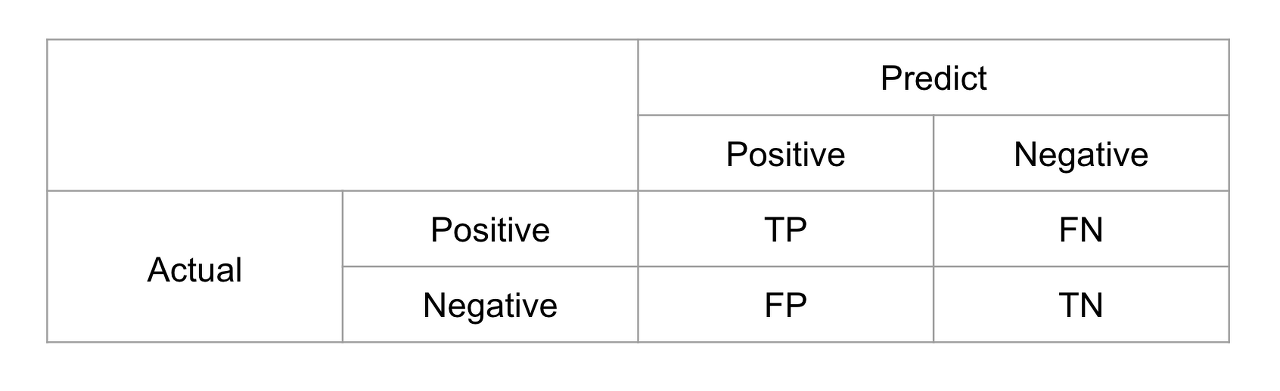

- TP(True Positive) : 긍정예측을 성공함. 즉, 환자라고 예측하고 실제환자임을 맞춤
- TN(True Negative) : 부정예측을 성공. 즉, 환자가 아니라 예측하고, 환자아님을 맞춤
- FP(False Positive) : 긍정예측을 실패. 즉, 환자라고 예측했지만 비환자임.
- FN(False Negative) : 부정예측을 실패, 즉, 비환자라고 예측했지만 실제환자임. 환장;;

#### Accuracy 

: 전체 예측한 것 중에 올바른 예측을 얼마나 했는지.

Accuracy = $\frac{올바르게 예측한 수} {전체 예측 수}$ = $\frac{TP + TN} {P + N}$

https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

In [ ]:
# 또는 학습된 로지스틱 회귀모델의 score메소드는 분류 정확도를 return한다. 
# 예측값을 내지않고, 바로 정확도를 알아보는 방법.
# 만든모델.score(검증세트 X, 검증세트 y)

logistic.score(X_val_imputed, y_val)  #X검증세트를 로지스틱으로 예측한 값을 기존의 검증세트 target과 비교함. 

## 시각화

In [ ]:
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
# countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html
# countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.
sns.countplot(x="column_name", data=dataframe)
data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

In [ ]:
# 

import plotly.express as px
px.scatter(
    df_study,
    x='Q1',
    y='Total',
    trendline='ols'
)